# Evaluate Results
- This file takes the best models for each algorithm implementation and compares them.

## Load the Test Data

In [1]:
import numpy as np

data = np.load('data.npz')
y_test = data['y_test']

## Get the Predictions

In [2]:
from all_models import optimal_SVM, optimal_Decision_Tree, optimal_Logistic_Regression, optimal_MLP

# Load the best model predictions
svm_pred = optimal_SVM()
tree_pred = optimal_Decision_Tree()
mlp_pred = optimal_MLP()
lr_pred = optimal_Logistic_Regression()


# All predictions on a single data structure
predictions = { 
               'SVM': svm_pred,
            #    'Decision Tree': tree_pred,
               'MLP': mlp_pred,
            #    'Logistic Regression': lr_pred
               }

/Users/carlosrabat/Desktop/ML-Project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.5879 - loss: 131774496.0000
Epoch 2/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6700 - loss: 33742380.0000
Epoch 3/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.6653 - loss: 21080376.0000
Epoch 4/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.7133 - loss: 20835038.0000
Epoch 5/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.6930 - loss: 17408696.0000
Epoch 6/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.7100 - loss: 15961930.0000
Epoch 7/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.6735 - loss: 12107407.0000
Epoch 8/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.7332 - loss: 9826499.0000
Epoch 9/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7160 - loss: 10449260.0000
Epoch 10/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.7301 - loss: 8499025.0000
Epoch 11/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/

## Evaluate the Results
- Classification report for each model
- Consolidated Graph with Accuracy, Recall and F1 Score

In [3]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score

# Calculate the accuracy for each
models_accuracy = { 
               'SVM': accuracy_score(y_test, svm_pred),
            #    'Decision Tree': accuracy_score(y_test,tree_pred),
               'MLP': accuracy_score(y_test,mlp_pred),
            #    'Logistic Regression': accuracy_score(y_test,lr_pred)
}

models_recall = { 
               'SVM': recall_score(y_test, svm_pred),
            #    'Decision Tree': recall_score(y_test,tree_pred),
               'MLP': recall_score(y_test,mlp_pred),
            #    'Logistic Regression': recall_score(y_test,lr_pred)
}

models_f1score = { 
               'SVM': f1_score(y_test, svm_pred),
            #    'Decision Tree': f1_score(y_test,tree_pred),
               'MLP': f1_score(y_test,mlp_pred),
            #    'Logistic Regression': f1_score(y_test,lr_pred)
}

# Prin the Classification Report 
for key, value in predictions.items():
    print(f'Model {key}: ')
    print(f'Classification Report: \n {classification_report(y_test, value)}')

Model SVM: 
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1321
           1       0.16      0.77      0.27        43

    accuracy                           0.87      1364
   macro avg       0.58      0.82      0.60      1364
weighted avg       0.97      0.87      0.91      1364

Model MLP: 
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1321
           1       0.06      0.09      0.07        43

    accuracy                           0.92      1364
   macro avg       0.51      0.52      0.52      1364
weighted avg       0.94      0.92      0.93      1364



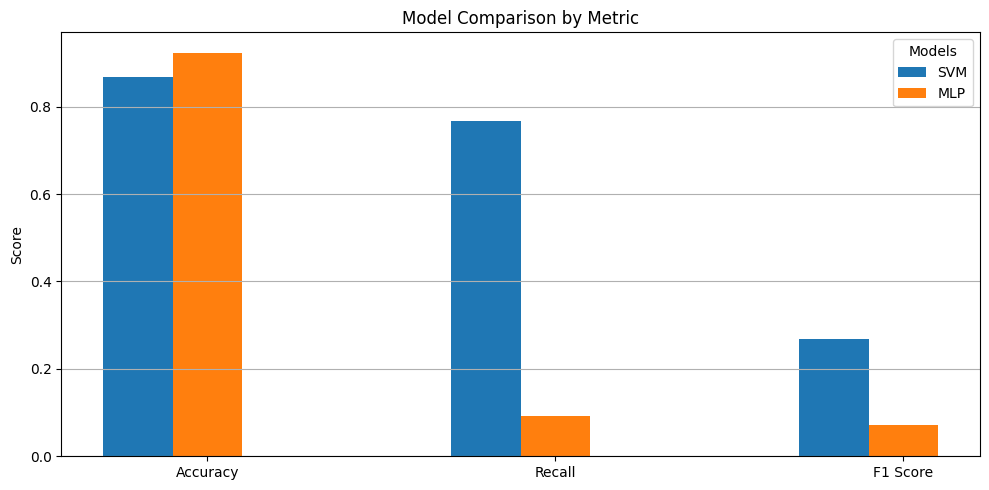

In [6]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['Accuracy', 'Recall', 'F1 Score']

# Setting the positions and width for the bars
pos = np.arange(len(metrics))
width = 0.2  # the width of a bar

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 5))

# Create bars for each model and metric
for i, model in enumerate(models_accuracy):
    
    metric_data = [models_accuracy[model], models_recall[model], models_f1score[model]]
    
    ax.bar(pos + i * width, metric_data, width, label=model)

# Set the y-axis label
ax.set_ylabel('Score')
ax.set_title('Model Comparison by Metric')
ax.set_xticks(pos + width)
ax.set_xticklabels(metrics)


plt.legend(title="Models")
plt.tight_layout()
plt.grid()
ax.xaxis.grid(False)

plt.show()
